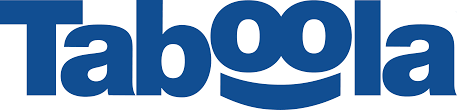

# Taboola CTR Value-For-Money Prediction
---

> Catboost, xgboost basline

> some fully connected network

In [1]:
from collections import Counter
import pandas as pd
import logging
import os

## Data

In [2]:
sample = pd.read_csv('./raw_data/part-00002.csv')
sample.head()

,page_view_start_time,user_id_hash,target_id_hash,syndicator_id_hash,campaign_id_hash,empiric_calibrated_recs,empiric_clicks,target_item_taxonomy,placement_id_hash,user_recs,...,source_id_hash,source_item_type,browser_platform,os_family,country_code,region,day_of_week,time_of_day,gmt_offset,is_click
0,1586972175040,cc720429312f18d7b2e4c113c6f48cef3d16836b7fdce0...,e47742764f99fbe66f06369af9557667a87acf3d7942a1...,f7fc333375dc274f0c94a23df0b3768404f87195742a6e...,8681b856166e1e7f002f6a2607a4e2ba35ec4d9ce9812e...,129.53584,930.0,LIFE~TRAVEL,251974fe3b996b3c952690db23c62aa3698a99e46ee022...,1051.0,...,acefa4deefb13b8d19cbe262528f5c3532bc7f0363e4c3...,text,DESK,6,US,NH,3,13,-400,1.0
1,1586553332086,d8bc219c47b2570fea85d82b9df00973487e8ab1ca76e1...,cfbc031f0bacfa09f2a70a02c1024711d2e7ef205e9339...,888081c07a6adc27ad51bde46544a5fe2f803e8293e561...,7b4c9ccff73b03f8d6c41d8b2dd4d190f387081b7e5b2c...,357.14075,1286.0,LIFE~PETS,970f1987570a4ece129c056ddf4de53b1f43b0882ea65c...,1074.0,...,4c7987d659b97d2007c45bb3c9fd903b135a2ef18130f7...,homepage,DESK,6,US,NV,5,14,-700,0.0
2,1586231495787,ed8ddb92498f13f88101c13e0a26fdcc87db5d929c17d2...,c775af6de0b254897ec4d00d174e298a6d34dd6e2c104b...,100328dbbf569e6848665b2cd40823e7dde2175050d987...,6801569fe0d16817528745e61b4897202634ea9905a5f2...,298.30496,139.0,LIFE~HOME,3ce0dc6ef6be59d27da0a3ecbd2b5b28c88bf5e3a98bc9...,320.0,...,09bb81e4503b782e80b2c802ad08576f39f76cc4c466dd...,text,DESK,6,US,NY,1,23,-400,0.0
3,1586720067383,f2b6bcf14717b7148cb8f92cbcbecb3a9ff24607b0a5c9...,b62da02a3fc769b747ec9de5bc90d988646ef35ad39873...,778263b6cc984e65c497d16b7fec917c3230cbdcc56fa1...,e7b35c85695999bbcbfc4d10b932c5e8b6b52d5720237e...,50006.86300,64460.0,TECH,39d46cdd8f08693dd0cb967d016efec97d0bc5eb1899dc...,206.0,...,c83159630182a5b7bc3c3fc985156c03b2a43129d63376...,homepage,DESK,6,US,AR,0,14,-500,1.0
4,1586820341555,6ea6706128c562661fd6ec45ea2521a9f2837c8c9d5078...,a07a13aa1a83706186e4bf205ba79c614697284a059e08...,a517d24ada92fc973f1612bd27ce716ff506485868d441...,b8abf8828615be8732cbe1589fa2c8f4fd8cecb5bca791...,15547.64200,7094.0,LIFE~HEALTH,f46a38c5c8d89917121df61f7a725748354c47dfc79cfe...,0.0,...,c83159630182a5b7bc3c3fc985156c03b2a43129d63376...,homepage,DESK,6,US,GA,1,19,-400,0.0


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = sample.drop('is_click', axis=1)

In [6]:
y = sample.is_click

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
test_raw = pd.read_csv('./raw_data/test_file.csv')
test_raw.head()

In [ ]:
len(sample.columns)

# Pre Processing

In [8]:
from kaggle.preprocess.features import FeaturesProcessor
features_processor = FeaturesProcessor(onehot=False)
features_processor.fit(X_train)
len(features_processor.features_names)

38

In [11]:
X_test_ = features_processor.transform(X_test)
print(X_test_.shape)

(138672, 22)


In [ ]:
#test = features_processor.transform(test_raw)

# Models - CatBoost

In [13]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(loss_function='Logloss')

In [23]:
X_train_[0]

array(['f5ed22c03602a3aa3f92bae064bd47c628bbcb116a76ebe0df9c7ce74907e4479454842bc00dc76625185d72fb3d92526a7ef160d4825258f9446618d5934904',
       'e17a0aa7d5ac9b69a4933bd345349ddad97a54bad0959d00154c41387bbec7d806896cc93b63560c517b1a69f4ca80511faf27db8335e39ef9d240702b3345dc',
       'c91b3e132879b1bdea8b3b8377dbc031d597ad242e929e620d1f760908276cd1d685fae85aaeface86059e8d8ba969991176a6ad257a92562342204185c5fbfe',
       '77de1750e42c8269e4f36cb4c4be23cef013ceab5cfc7a0972ffc2aec488f080873fda22b7605d6bd3e8d967d14d6092ebbef5a9bc32e71a96a9e72f37c74e5c',
       'd835e6ee8ed1ca45d28bcc907a03cb38a81d825329668dec248dc3db9ec96446e886f689ce1a587927e89c080a7488f1abbdbe4f7de0b0d065aa6ebaff14f6ef',
       'CZ', 'unk',
       '848b127dbd0f3a647581f4a95325f5204f4577ad7956f6ccaee6bf1eec0c399e6b02015827a95741ae041adc2438fbd494076ece7796a5f6cf4eab29e1079cf3',
       'text', 'DESK', '6', 'TECH', 'NO_CATEGORY', 'NO_CATEGORY',
       '0.016713091922005572', '0.005571030640668524', '99186.37',
       '47754

In [26]:
model.fit(X_train_, list(y_train), cat_features=[0,1,2,3,4,5,6,7,8,9,11,12,13])


Learning rate set to 0.114523
0:	learn: 0.6472877	total: 249ms	remaining: 4m 9s
1:	learn: 0.6116920	total: 422ms	remaining: 3m 30s
2:	learn: 0.5850225	total: 571ms	remaining: 3m 9s
3:	learn: 0.5644413	total: 713ms	remaining: 2m 57s
4:	learn: 0.5488346	total: 868ms	remaining: 2m 52s
5:	learn: 0.5369921	total: 1s	remaining: 2m 46s
6:	learn: 0.5283713	total: 1.18s	remaining: 2m 47s
7:	learn: 0.5209390	total: 1.34s	remaining: 2m 45s
8:	learn: 0.5150318	total: 1.52s	remaining: 2m 47s
9:	learn: 0.5105511	total: 1.74s	remaining: 2m 52s
10:	learn: 0.5068615	total: 1.95s	remaining: 2m 55s
11:	learn: 0.5040507	total: 2.13s	remaining: 2m 55s
12:	learn: 0.5014006	total: 2.32s	remaining: 2m 56s
13:	learn: 0.4995144	total: 2.51s	remaining: 2m 57s
14:	learn: 0.4977987	total: 2.73s	remaining: 2m 59s
15:	learn: 0.4964430	total: 2.92s	remaining: 2m 59s
16:	learn: 0.4952725	total: 3.14s	remaining: 3m 1s
17:	learn: 0.4939087	total: 3.34s	remaining: 3m 2s
18:	learn: 0.4927496	total: 3.55s	remaining: 3m 3s


In [28]:
predictions = model.predict(X_test_)

In [29]:
predictions

array([1., 0., 0., ..., 0., 0., 1.])

In [36]:
fpr, tpr, threshold = metrics.roc_curve(list(y_test), predictions)
roc_auc = metrics.auc(fpr, tpr)

In [37]:
roc_auc

0.7747653399170669